>>> **1. Zipf ’s Law**


Empirically verify Zipf’s law. 

Use the following freely available corpora: <br>
• King James Bible (on Classroom)<br>
• The Jungle Book (on Classroom) <br>
• SETIMES Turkish-Bulgarian parallel newspaper text 
http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip <br>

1) For each corpus, compute a list of unique words sorted by descending frequency. Feel free to tokenize however you like, e.g. by splitting at whitespace.

2) Use the Python library matplotlib to plot the frequency curves for the corpora, i.e. x-axis is position in the frequency list, y-axis is frequency. Make
sure to provide both a plot with linear axes and one with log-log axes (see
methods matplotlib.pyplot.plot and matplotlib.pyplot.loglog) for
each corpus.

3) Provide a brief discussion of the findings, as well as the source code.

In [1]:
%matplotlib inline

import os
import string
from typing import List, Tuple
from collections import Counter
from functools import wraps
from timeit import default_timer as timer

import nltk
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%capture
# Data loading

if not os.path.exists("/content/junglebook.txt"):
    !wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Computational_Linguistics/HW1_ngram_models/junglebook.txt

if not os.path.exists("/content/kingjamesbible_tokenized.txt"):
    !wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Computational_Linguistics/HW1_ngram_models/kingjamesbible_tokenized.txt

if not os.path.exists("/content/SETIMES.bg-tr.tr") or not os.path.exists("/content/SETIMES.bg-tr.bg"):
    !wget http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip -O tr-bg-corpora.zip
    !unzip tr-bg-corpora.zip
    !rm tr-bg-corpora.zip LICENSE README SETIMES.bg-tr.ids

In [3]:
# It is expected to see here the following files: 
# - junglebook.txt
# - kingjamesbible_tokenized.txt
# - SETIMES.bg-tr.bg
# - SETIMES.bg-tr.tr
! ls

junglebook.txt		      sample_data	SETIMES.bg-tr.tr
kingjamesbible_tokenized.txt  SETIMES.bg-tr.bg


In [4]:
%%capture

# initial preparation

# downloading data for nltk tokenization and some literary texts for the 2d task
nltk.download('punkt')
nltk.download('gutenberg')

# creating set of punctuations to exclude them from list of tokens
punctuation = set(string.punctuation)
punctuation.update(["''", '``', '—'])

In [5]:
def timing(f):
    """Simple decorator to measure execution time for the function"""
    @wraps(f)
    def wrap(*args, **kw):
        start = timer()
        result = f(*args, **kw)
        end = timer()
        print(f"Time elapsed: {end-start}")
        return result
    return wrap

In [6]:
@timing
def read_data_and_return_tokens(filename: str, encoding: str = 'utf-8-sig', tokenize: bool = True,
                                exclude_punctuation: bool = True) -> List[str]:
    """
    Reads data from the provided filepath and returns list of tokens.

    By default following parameters are applied:
      - 'utf-8-sig' encoding
      - tokenization (separation) of punctuation from actual words
      - exclusion of punctuation tokens from word list
    """
    print(f"Processing the following file: {filename}...")
    tokens = []
    with open(filename, 'r', encoding=encoding) as f:
      for line in f:
        tokenized_line = nltk.word_tokenize(line.strip()) if tokenize else line.strip().split()
        if exclude_punctuation:
            tokenized_line = [token for token in tokenized_line if token not in punctuation]
        tokens.extend(tokenized_line)

    return tokens

In [7]:
def discover_data_and_return_ordered_frequencies(tokens: List[str]) -> List[int]:
    """Gives some insights about provided tokens and returns list of reversed tokens' frequencies."""
    print("First ten tokens: ", tokens[:10])
    tokens_counter = Counter(tokens)
    print("Top-10 tokens by frequency: ", tokens_counter.most_common(10))

    ordered_frequencies = sorted(tokens_counter.values(), reverse=True)

    return ordered_frequencies

In [8]:
def plot_frequencies(frequency_data: List[int], loglog: bool = False):
    if loglog:
        plt.loglog(range(1, len(frequency_data)+1), frequency_data)
        plt.title('Log frequency plot')
    else:
        plt.plot(range(1, len(frequency_data)+1), frequency_data)
        plt.title('Basic frequency plot')

In [9]:
# using a new cell to distguish data loading from data exploring
data_jungle = read_data_and_return_tokens('junglebook.txt')

Processing the following file: junglebook.txt...
Time elapsed: 0.8658486499999754


First ten tokens:  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'jungle', 'book', 'by', 'Rudyard']
Top-10 tokens by frequency:  [('the', 3397), ('and', 2259), ('of', 1298), ('to', 1232), ('a', 1122), ('he', 875), ('in', 720), ('I', 648), ('his', 638), ('that', 611)]


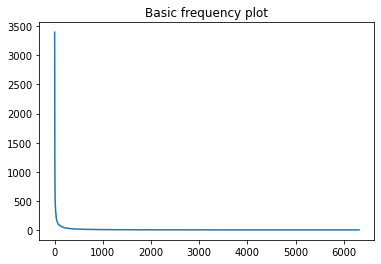

In [10]:
frequency_data = discover_data_and_return_ordered_frequencies(data_jungle)
plot_frequencies(frequency_data)

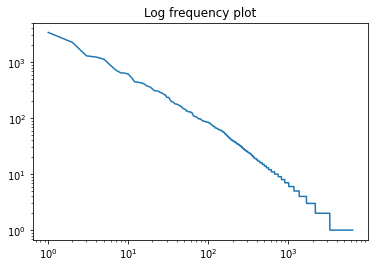

In [11]:
plot_frequencies(frequency_data, loglog=True)

In [12]:
data_bible = read_data_and_return_tokens('kingjamesbible_tokenized.txt')

Processing the following file: kingjamesbible_tokenized.txt...
Time elapsed: 5.833581856999984


First ten tokens:  ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth']
Top-10 tokens by frequency:  [('the', 62064), ('and', 38846), ('of', 34427), ('to', 13378), ('And', 12847), ('that', 12576), ('in', 12331), ('shall', 9760), ('he', 9666), ('unto', 8940)]


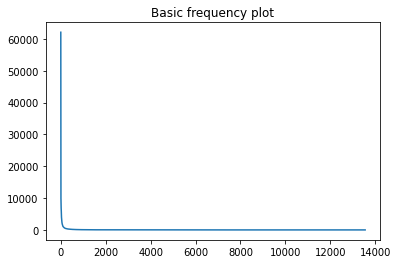

In [13]:
frequency_data = discover_data_and_return_ordered_frequencies(data_bible)
plot_frequencies(frequency_data)

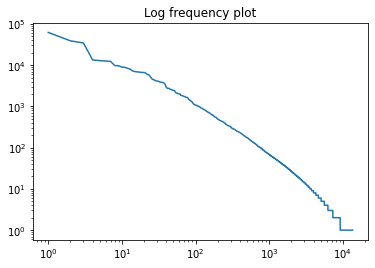

In [14]:
plot_frequencies(frequency_data, loglog=True)

In [15]:
data_tr = read_data_and_return_tokens('SETIMES.bg-tr.tr')

Processing the following file: SETIMES.bg-tr.tr...
Time elapsed: 43.316295688


First ten tokens:  ['Hırvat', 'yerel', 'seçimleri', 'ikinci', 'tura', 'kaldı', 'Sonuçlar', 'başta', 'büyük', 'şehirler']
Top-10 tokens by frequency:  [('ve', 99241), ('bir', 76150), ('için', 27414), ('bu', 21551), ('da', 20733), ('de', 20605), ('ile', 15097), ('günü', 14579), ('olarak', 14088), ('olan', 12688)]


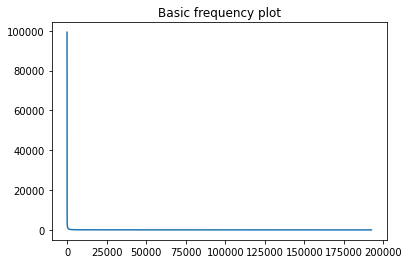

In [16]:
frequency_data = discover_data_and_return_ordered_frequencies(data_tr)
plot_frequencies(frequency_data)

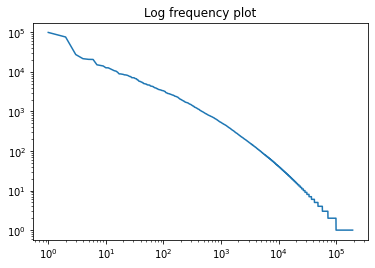

In [17]:
plot_frequencies(frequency_data, loglog=True)

In [18]:
data_bg = read_data_and_return_tokens('SETIMES.bg-tr.bg')

Processing the following file: SETIMES.bg-tr.bg...
Time elapsed: 42.69243774199998


First ten tokens:  ['Местните', 'избори', 'в', 'Хърватия', 'вървят', 'към', 'втори', 'тур', 'Резултатите', 'показаха']
Top-10 tokens by frequency:  [('на', 271026), ('в', 130818), ('и', 123536), ('за', 108269), ('да', 91104), ('от', 86940), ('се', 60088), ('е', 52169), ('че', 47390), ('с', 39177)]


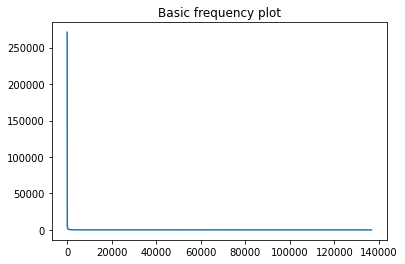

In [19]:
frequency_data = discover_data_and_return_ordered_frequencies(data_bg)
plot_frequencies(frequency_data)

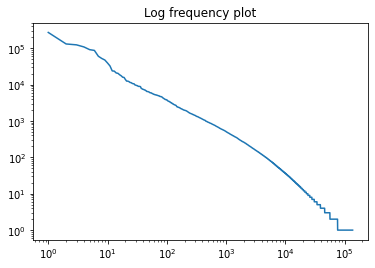

In [20]:
plot_frequencies(frequency_data, loglog=True)

**Conclusion**


Let's take a simple definition of Zipf's law from wikipedia.


Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.

Then, we expect to see 1/x lines for usual order-to-frequency graphics. Also, according to the lecture, log(absolute frequency) falls linearly with log(rank)
i.e., most words are really rare. We observe both phenomena empirically.

Finally, we see that plots above prove the idea that even across languages Zipf's law works well, since all plots have almost the same line on them.

Also, I wanted to test Zipf's law on my own corpora (Russian and Belarusian languages). Data is available via Google Storage (link below). 

In [21]:
import os

if not os.path.isdir("/content/Separate Corpuses/"):
    !gsutil -m cp -r "gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/" .

Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Rus.txt_tc.model...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Bel.txt_tc.model...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Rus.txt_tok.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Bel.txt_tok.txt_true.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Rus.txt_tok.txt_true.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Bel.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/Corpus_Bel.txt_tok.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/MiddleSent/MiddleSentCorpus_Bel.txt...
Copying gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separa

In [22]:
# it takes 100 second to load full corpus to memory (~420k sentences)
# data_be_full = read_data_and_return_tokens(os.path.join('Separate Corpuses', 'FullCorpus', 'Corpus_Bel.txt'))

In [23]:
# data_ru_full = read_data_and_return_tokens(os.path.join('Separate Corpuses', 'FullCorpus', 'Corpus_Rus.txt'))

In [24]:
data_be_small = read_data_and_return_tokens(os.path.join('Separate Corpuses', 'MiddleSent', 'MiddleSentCorpus_Bel.txt'))

Processing the following file: Separate Corpuses/MiddleSent/MiddleSentCorpus_Bel.txt...
Time elapsed: 8.29226990699999


In [25]:
data_ru_small = read_data_and_return_tokens(os.path.join('Separate Corpuses', 'MiddleSent', 'MiddleSentCorpus_Rus.txt'))

Processing the following file: Separate Corpuses/MiddleSent/MiddleSentCorpus_Rus.txt...
Time elapsed: 8.233295575999989


First ten tokens:  ['Аналіз', 'рынкаў', 'збыту', 'Стратэгія', 'маркетынгу', 'і', 'Інвестыцыйны', 'і', 'інавацыйны', 'план']
Top-10 tokens by frequency:  [('ў', 11152), ('і', 8681), ('не', 7668), ('на', 7406), ('з', 5639), ('У', 5423), ('у', 5287), ('гэта', 4027), ('што', 3804), ('да', 2393)]


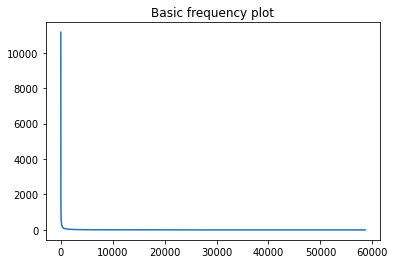

In [26]:
frequency_data = discover_data_and_return_ordered_frequencies(data_be_small)
plot_frequencies(frequency_data)

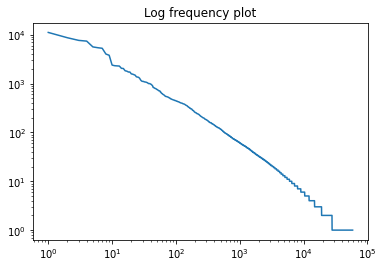

In [27]:
plot_frequencies(frequency_data, loglog=True)

**2 Random Text Generation**

In this assignment, you will reimplement the “Dissociated Press” system that was developed by MIT students in the 1970s (see [Wikipedia](https://en.wikipedia.org/wiki/Dissociated_press)). The purpose of this system is to generate random text from an n-gram model over a corpus.

a) Train an instance of the n-gram class on Classroom using a corpus of your choice (from Problem 1 or elsewhere), and name it ngram. You can then use ngram[context] to determine the probability distribution for the next word given the previous n − 1 words. Given this distribution, you can use the method generate from the NLTK class ProbDistI to generate the next random word.

b) Use your system to produce a number of text samples, 100 words in length per each. Vary n from 2 to 4. 

c) Submit a few interesting texts that your system generates for each n, and discuss how the quality (and creativity) of the generated outputs changes with n. Also submit your source code, and document any dependencies, such as links to the selected corpora.

In [28]:
# Copy-pasted from the provided file (ngram.py).

from nltk.probability import (FreqDist, ConditionalFreqDist, ConditionalProbDist, MLEProbDist, SimpleGoodTuringProbDist)
from nltk.util import ngrams


def ml_estimator(freqdist):
    return MLEProbDist(freqdist)

def goodturing_estimator(freqdist):
    return SimpleGoodTuringProbDist(freqdist)

class BasicNgram(ConditionalProbDist):
    """
    Define and train an Ngram Model over the corpus represented by the list words. 
    Given an BasicNgram instance ngram and a (n-1)-gram context (i.e., a tuple of n-1 strings), 
    a call to ngram[context] returns a nltk.probability.ProbDistI object representing the Probability distribution P(.|context) over possible values for the next word. 
    Be aware that context has to be a tuple, even if context is a unigram (see example below)
    
    >>> corpus=['a','b','b','a']
    >>> bigram=BasicNgram(2,corpus)
    >>> bigram.contexts()
    [('<$>',), ('a',), ('b',)]
    >>> p_b=bigram[('b',)] #not bigram['b']!!!
    >>> p_b.prob('a')
    0.5
    >>> p_b.prob('b')
    0.5
    
    :param n: the dimension of the n-grams (i.e. the size of the context+1).
    :type n: int
    :param corpus: 
    :type corpus: list(Str)
    
    other parameters are optional and may be omitted. They define whether to add artificial symbols before or after the word list, 
    and whether to use another estimation methods than maximum likelihood.
    """
    def __init__(self, n, words, start_symbol="<$>", end_symbol="</$>", pad_left=True, pad_right=False, estimator=ml_estimator):
        assert (n > 0)
        self._n=n
        self._words=words
        self._counter=ConditionalFreqDist()
        self._start_symbol=start_symbol
        self._end_symbol=end_symbol
        self._pad_left=pad_left
        self._pad_right=pad_right
        self._train()
        super().__init__(self._counter, estimator)
        
        
    def _train(self):       
        _ngrams=self.generate_ngrams()        
        for ngram in _ngrams:
            context=ngram[0:-1]
            outcome=ngram[-1]
            self._counter[context][outcome]+=1
            

    def generate_ngrams(self):
      """ Returns a generator over the ngrams of the word corpus."""
      return ngrams(self._words, self._n, self._pad_left, self._pad_right,
                    left_pad_symbol=self._start_symbol,
                    right_pad_symbol=self._end_symbol)


    def contexts(self):
        """Return the list of contexts"""
        return list(self.conditions())

In [29]:
# demo to check functions usage
bigram = BasicNgram(2, data_bible)

ngram_generator = bigram.generate_ngrams()
for i in range(10):
    print(next(ngram_generator))

corpus=['b','b','c','a', 'b', 'c']
bigram=BasicNgram(2,corpus)
print(bigram.contexts())

p_b=bigram[('b',)]
print(p_b)
print(dir(p_b))

print(p_b.discount())
print(p_b.freqdist())
print(p_b.generate())
print(p_b.logprob(sample='a'))
print(p_b.max())
print(p_b.prob(sample='a'))
print(p_b.samples())
print(p_b.unicode_repr)

print(p_b.generate())
print('a', p_b.prob('a'))
print('b', p_b.prob('b'))
print('c', p_b.prob('c'))

('<$>', 'In')
('In', 'the')
('the', 'beginning')
('beginning', 'God')
('God', 'created')
('created', 'the')
('the', 'heaven')
('heaven', 'and')
('and', 'the')
('the', 'earth')
[('<$>',), ('b',), ('c',), ('a',)]
<MLEProbDist based on 3 samples>
['SUM_TO_ONE', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_abc_impl', '_freqdist', 'discount', 'freqdist', 'generate', 'logprob', 'max', 'prob', 'samples', 'unicode_repr']
0.0
<FreqDist with 2 samples and 3 outcomes>
b
-1e+300
c
0.0
dict_keys(['b', 'c'])
<bound method MLEProbDist.__repr__ of <MLEProbDist based on 3 samples>>
c
a 0.0
b 0.3333333333333333
c 0.6666666666666666


In [30]:
TEXT_WORD_LIMIT = 100

In [31]:
# it is better to generate sentences with enabled punctuation
data_bible_with_punctuation = read_data_and_return_tokens('kingjamesbible_tokenized.txt', exclude_punctuation=False)
print(len(data_bible_with_punctuation))

Processing the following file: kingjamesbible_tokenized.txt...
Time elapsed: 5.66558834600005
915494


In [32]:
# setup models
four_gram = BasicNgram(4, data_bible_with_punctuation)
trigram = BasicNgram(3, data_bible_with_punctuation)
bigram = BasicNgram(2, data_bible_with_punctuation)

In [33]:
import re

def create_result_text_from_tokens(tokens: List[str]):
    """Creates output text by joining tokens and removing extra spaces before punctuation."""
    text = " ".join(tokens)
    # regex to join punctuation back to text
    # link to the source https://stackoverflow.com/questions/18878936/how-to-strip-whitespace-from-before-but-not-after-punctuation-in-python
    text = re.sub(r'\s([?.!:,;"](?:\s|$))', r'\1', text)
    return text

In [34]:
def generate_text(model: BasicNgram, context: Tuple, word_limit: int = TEXT_WORD_LIMIT):
    """Generates text based on input model and passed start context."""
    
    # to avoid later exceptions
    if model._n != len(context) + 1:
        raise Exception(f"Model level {model._n} does not match passed start context {context}.")
    
    text_tokens = list(context)

    while len(text_tokens) != word_limit:
        next_token_model=model[context]
        next_token = next_token_model.generate()
        text_tokens.append(next_token)
        context = (*context[1:], next_token)

    return create_result_text_from_tokens(text_tokens)

In [35]:
# Generating text for 4gram model
generate_text(four_gram, context=('God', 'said', 'to'))

'God said to Solomon, to hear his voice, and that the smoke of their torment ascendeth up for ever and ever. Amen. Timotheus my workfellow, and Lucius of Cyrene, Simon by name: him they compelled to bear his cross, and follow me. And he said unto him, Follow me, and have not sought the LORD went forth, and saw corruption: But he shall let him go; And answered them after the same manner also he took the people, and for your liberal distribution unto them'

In [36]:
# Generating text for 3gram model
generate_text(trigram, context=('God', 'said'))

"God said, We have drunken of her virginity, and of him that had eaten were about me for thy son 's mandrakes also? For when he began to speak, until ye were healed: forsake not the congregation of the sea, tossed with waves: for it is near, and they know not the apple tree, the son of Joel, the son of Jesse liveth upon the children of Israel: and now also the Levites, for an offering made by fire; it shall consume with the filthiness of the"

In [37]:
# Generating text for 2gram model
generate_text(bigram, context=('God',))

"God, and many angels of an earthen vessel, Lord Jesus said unto Caesar 's wife, which I say, and where is my mouth of Elkanah her little chambers of God spake, which the Canaanites, saying, jewels; lo, until they smote of Ahikam the promises of his enemies. Sow to seek after these are profound to Jerusalem. But your God. Two wagons which be not know that they said to Caesar: the men live after those places of the name be an idol, keep his dominion is"

In [38]:
# I've decided to check another estimator either
four_gram_turing = BasicNgram(4, data_bible_with_punctuation, estimator=goodturing_estimator)
trigram_turing = BasicNgram(3, data_bible_with_punctuation, estimator=goodturing_estimator)
bigram_turing = BasicNgram(2, data_bible_with_punctuation, estimator=goodturing_estimator)

/usr/local/lib/python3.7/dist-packages/nltk/probability.py:1364: UserWarning: SimpleGoodTuring did not find a proper best fit line for smoothing probabilities of occurrences. The probability estimates are likely to be unreliable.
  warnings.warn('SimpleGoodTuring did not find a proper best fit '


In [39]:
# Generating text for 4gram model
generate_text(four_gram, context=('God', 'said', 'to'))

"God said to Jonah, Doest thou well to be angry for ever? wilt thou not depart from their service; for their wickedness. Whoso stoppeth his ears from hearing of blood, until he hath done, do unto her: ye will surely accomplish your vows, and beside the chains that were about their camels ' necks. And Gideon made an ephod thereof, and eastward Naaran, and westward Gezer, with the meat offering that remaineth of the offerings of the children of Ammon, and of the fat, and the"

In [40]:
# Generating text for 4gram model
generate_text(trigram, context=('God', 'said',))

'God said, What will ye not: for all the prophets? And they told Shimei, The LORD God walking in craftiness, nor be raised the third time, and their mighty ones are in thy hot displeasure, wherewith a man in vile raiment; but we have brought about the tabernacle of the finger of God: but the wife, and the waters cover the sea upon the mitre of fine twined linen: and as we are judged, and that night; that I might not defile himself for us, as'

Additionally, I've decided to check other corpora.
[Here](https://www.nltk.org/book/ch02.html) is a good overview of nltk corpora.

In [41]:
from nltk.corpus import gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [42]:
for file_id in gutenberg.fileids():
    print(file_id, len(gutenberg.words(file_id)))

austen-emma.txt 192427
austen-persuasion.txt 98171
austen-sense.txt 141576
bible-kjv.txt 1010654
blake-poems.txt 8354
bryant-stories.txt 55563
burgess-busterbrown.txt 18963
carroll-alice.txt 34110
chesterton-ball.txt 96996
chesterton-brown.txt 86063
chesterton-thursday.txt 69213
edgeworth-parents.txt 210663
melville-moby_dick.txt 260819
milton-paradise.txt 96825
shakespeare-caesar.txt 25833
shakespeare-hamlet.txt 37360
shakespeare-macbeth.txt 23140
whitman-leaves.txt 154883


In [43]:
source_corpus = nltk.corpus.gutenberg.words('austen-sense.txt')

four_gram = BasicNgram(4, source_corpus)
trigram = BasicNgram(3, source_corpus)
bigram = BasicNgram(2, source_corpus)

In [44]:
print(source_corpus[:100])

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.', 'The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion']


In [45]:
generate_text(four_gram, context=('she', 'said', 'to'))

'she said to Elinor, when it came to the point. It would be impossible to go to - morrow ."" Ay, so do, Sir John was rather puzzled. " Upon my word ," replied Elinor, in spite of the ALMOST impossibility of their being really invited to become such, while Mrs. Jennings are to be the remains of the lovely, blooming, healthful girl, on whom I had once known, as resembling, in some measure quieted it, and was too intent on what he said to'

In [46]:
generate_text(bigram, context=('she',))

'she did not being farther than when you know young ladies the benevolence of her cousins away, I never was to see Marianne, nor desire for Edward himself, " And she did or himself. They had been, by mutual regard, who then heard was not help looking at a better income, merry, how I should have nothing in your judgment, would be wrong in case, as soon as Mrs. Palmer, you under the first evening of Mrs. Scarcely a widower. Jennings, was given by a'

In [47]:
generate_text(bigram, context=('she',))

'she was not heard. Marianne, his heart, his looks, to be offended them ."" I had really so very urgent with Sir John Dashwood, if he would spoil, Miss Grey is HE in the world ."" Well ," said, the Miss Marianne, of wretchedness of her mother; and of her brother had passed between this persuasion and scarcely able to return her mother had received most pointed out of it. Why, and Lucy was to be kept back, talked of three together every subject than it'

In [48]:
generate_text(bigram, context=('she',))

'she had not come out, and forbearance could ask my life of his own coach full of the tithes, " My love with rather favourable symptom more if Edward! how it !-- But there were waiting on the air altogether so ridiculous. Don \' s puppies! I have it is so very morning in a village. Mrs. Mrs. But though she cried Mr. Her mind. " that want me particulars in an entrance was heard by Mrs. Her flattery which child, however; but it. Of his'

Here are key takeaways:

1) Size of the corpus is very important. Small number of tokens limits the variety of output text.

2) We should know at least some tokens from text to start generation. For instance, it is almost impossible to guess valid 4gram start context. I was starting with bigram model and later added words to upper-level models one by one.

**Conclusion**

Finally, the most creative option is a bigram model with a common word as a start context. However, the coherency of the output is really low.

On the other hand, upper-level models (4gram) with specific start context has low variety of outputs, but the coherency is very good. This fact could be explained, since we are taking almost ready pieces from the text.



**3. Statistical dependence**

In statistical NLP we frequently make independence assumptions about relevant events which are not actually correct in reality. We are asking you to test the independence assumptions of unigram language models.

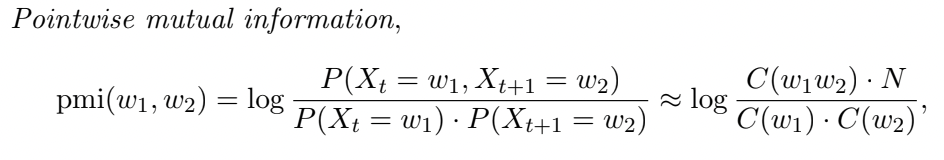

is a measure of statistical dependence of the events Xt = w1 and Xt+1 =
w2; C(w) is the absolute frequency and N is the size of the corpus. If the
probability of the next word in the corpus being w2 is unaffected by the
probability of the previous word being w1, then pmi(w1, w2) = 0; otherwise
the pmi is positive or negative.

Calculate the pmi for all successive pairs (w1, w2) of words in a corpus of
your choice. Words (not word pairs!) that occur in the corpus less than 10
times should be ignored. List the 20 word pairs with the highest pmi value
and the 20 word pairs with the lowest pmi value.

Document and submit your observations and code. Discuss the validity of
the independence assumption for unigram models.

In [49]:
import math
from collections import defaultdict

In [50]:
_ = discover_data_and_return_ordered_frequencies(data_bible)

First ten tokens:  ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth']
Top-10 tokens by frequency:  [('the', 62064), ('and', 38846), ('of', 34427), ('to', 13378), ('And', 12847), ('that', 12576), ('in', 12331), ('shall', 9760), ('he', 9666), ('unto', 8940)]


In [51]:
def report_pmi(tokens: List[str]):
    # at first we need to get absolute frequencies of each word
    # and exclude words with absolute frequency less than 10
    unigram_counter = {word: word_count for word, word_count in Counter(tokens).items() if word_count >= 10}
    bigram_counter = defaultdict(int)

    # counting bigram absolute frequencies with respect to filtered unigram corpus
    for i in range(1, len(tokens)):
        prev_word, cur_word = tokens[i-1:i+1]
        if prev_word not in unigram_counter or cur_word not in unigram_counter:
            continue
        bigram_counter[(prev_word, cur_word)]+=1

    # calculating PMI with formula from task description
    N = len(unigram_counter)
    pmi = []
    for (prev_word, cur_word), bigram_count in bigram_counter.items():
        numerator = bigram_count*N
        denominator = unigram_counter[prev_word] * unigram_counter[cur_word]
        pmi.append((math.log(numerator/denominator), (prev_word, cur_word)))

    pmi.sort()

    # report most popular bigrams to compare this list with best/worst bigrams according to PMI
    print("Most popular bigrams:", sorted(bigram_counter, key=bigram_counter.get, reverse=True)[:10])
    print("Best bigrams ever:", pmi[:-20:-1])
    print("Worst bigrams ever:", pmi[:20])

In [52]:
report_pmi(data_bible)

Most popular bigrams: [('of', 'the'), ('the', 'LORD'), ('in', 'the'), ('and', 'the'), ('shall', 'be'), ('And', 'the'), ('to', 'the'), ('all', 'the'), ('unto', 'the'), ('I', 'will')]
Best bigrams ever: [(5.4505996353152675, ('Shadrach', 'Meshach')), (4.975480905402762, ('badgers', 'skins')), (4.672294646415015, ('ill', 'favoured')), (4.530464450975797, ('Judas', 'Iscariot')), (4.443453073986168, ('Jonas', 'lovest')), (4.366912996863833, ('curious', 'girdle')), (4.363410366312631, ('brook', 'Kidron')), (4.315619702476283, ('poureth', 'contempt')), (4.279150022694892, ('measuring', 'reed')), (4.266829538306851, ('divers', 'colours')), (4.220309522671958, ('persecution', 'ariseth')), (4.151647284350525, ('Mary', 'Magdalene')), (4.124999342867633, ('precept', 'precept')), (4.037987965878004, ('overflowing', 'scourge')), (3.9935362033071695, ('sharp', 'sickle')), (3.9579452582044667, ('throughly', 'purge')), (3.9475103809118877, ('Shem', 'Ham')), (3.923577614700259, ('wreathen', 'chains')), 

In [53]:
report_pmi(data_jungle)

Most popular bigrams: [('of', 'the'), ('in', 'the'), ('and', 'the'), ('to', 'the'), ('on', 'the'), ('he', 'was'), ('and', 'he'), ('with', 'the'), ('for', 'the'), ('of', 'a')]
Best bigrams ever: [(4.3067641501733345, ('United', 'States')), (4.21145397036901, ('Machua', 'Appa')), (4.044399885705844, ('Literary', 'Archive')), (3.8059888622608455, ('Black', 'Panther')), (3.5648268054439574, ('LITTLE', 'TOOMAI')), (3.431295412819435, ('Archive', 'Foundation')), (3.384775397184542, ('Of', 'course')), (3.3135123771630512, ('Gutenberg', 'Literary')), (3.2653102753451737, ('Once', 'twice')), (3.2420534131809062, ('Two', 'Tails')), (3.102791345847399, ('TIGER', 'TIGER')), (3.054001181677967, ('Petersen', 'Sahib')), (3.0258303047112705, ('SAID', 'LITTLE')), (3.0081307276118694, ('Council', 'Rock')), (2.985008310191015, ('Black', 'Snake')), (2.9717630834409947, ('Gray', 'Brother')), (2.902770211954043, ('hind', 'legs')), (2.8251596092491194, ('twenty', 'yoke')), (2.8251596092491194, ('fore', 'paws

In [54]:
report_pmi(data_bg)

Most popular bigrams: [('да', 'се'), ('трябва', 'да'), ('за', 'да'), ('може', 'да'), ('на', 'ЕС'), ('време', 'на'), ('да', 'бъде'), ('и', 'да'), ('ще', 'бъде'), ('Southeast', 'European')]
Best bigrams ever: [(7.688496999792292, ('Шуто', 'Оризари')), (7.688496999792292, ('Мерил', 'Линч')), (7.601485622802663, ('Цецка', 'Цачева')), (7.583136484134466, ('Есра', 'Ердуран')), (7.560663628282408, ('Мелина', 'Меркури')), (7.521442915129127, ('Портал', 'Аналитика')), (7.521442915129127, ('Андрис', 'Пиебалгс')), (7.447334942975405, ('Орест', 'Ерзени')), (7.447334942975405, ('Джалал', 'Талабани')), (7.4271322356578855, ('Газменд', 'Окета')), (7.419164066008708, ('почетния', 'караул')), (7.378342071488453, ('Сантяго', 'Калатрава')), (7.378342071488453, ('Санкт', 'Петербург')), (7.378342071488453, ('Кристин', 'Лагард')), (7.378342071488453, ('Зенун', 'Паязити')), (7.378342071488453, ('Ертугрул', 'Гюнай')), (7.370043268673758, ('въглероден', 'диоксид')), (7.367292235301869, ('Нася', 'Ненова')), (7.

In [55]:
# report_pmi(data_be_full)
# report_pmi(data_ru_full)

In [56]:
report_pmi(data_be_small)

Most popular bigrams: [('Пра', 'гэта'), ('ў', 'Беларусі'), ('ў', 'Мінску'), ('сказаў', 'ён'), ('яго', 'слоў'), ('Пры', 'гэтым'), ('Паводле', 'яго'), ('Аб', 'гэтым'), ('У', 'нас'), ('Аляксандр', 'Лукашэнка')]
Best bigrams ever: [(6.2178336599316655, ('вязнем', 'сумлення')), (6.2178336599316655, ('Комсомольская', 'правда')), (6.143725687777944, ('маладзёжнага', 'крыла')), (6.137790952258129, ('масавым', 'стартам')), (6.11247314427384, ('устанавіла', 'дыпламатычныя')), (6.074732816290992, ('Удзельная', 'вага')), (6.069617715624222, ('дробным', 'хуліганстве')), (6.010194295153421, ('смяротнай', 'кары')), (5.9495696733369865, ('правда', 'в')), (5.943054992315792, ('ФІФА', 'апублікуе')), (5.914884115349096, ('Вялікай', 'Айчыннай')), (5.787050743839211, ('аналагічны', 'леташні')), (5.787050743839211, ('Сярэдняя', 'выніковасць')), (5.787050743839211, ('Міжнародная', 'амністыя')), (5.7588798668725145, ('калійных', 'угнаенняў')), (5.741930308558742, ('в', 'Белоруссии')), (5.738260579669779, ('із

In [57]:
report_pmi(data_ru_small)

Most popular bigrams: [('Об', 'этом'), ('в', 'Беларуси'), ('в', 'Минске'), ('По', 'его'), ('у', 'нас'), ('сказал', 'он'), ('его', 'словам'), ('При', 'этом'), ('в', 'этом'), ('У', 'нас')]
Best bigrams ever: [(6.396778128585051, ('сельском', 'хозяйстве')), (6.309766751595421, ('молодежного', 'крыла')), (6.229724043921885, ('узником', 'совести')), (6.229724043921885, ('базовых', 'величин')), (6.2144565717910965, ('Великой', 'Отечественной')), (6.155616071768163, ('мелком', 'хулиганстве')), (6.155616071768163, ('Будзьма', 'беларусамі')), (6.068604694778533, ('световозвращающими', 'элементами')), (6.006580492607675, ('массовым', 'стартом')), (5.9673597794543936, ('установила', 'дипломатические')), (5.954945376306012, ('ФИФА', 'опубликует')), (5.953091807656689, ('Любовь', 'Ковалева')), (5.904301643487257, ('правовом', 'интернет-портале')), (5.904301643487257, ('оформлены', 'нарушителями')), (5.904301643487257, ('Удельный', 'вес')), (5.82425893581372, ('дай', 'бог')), (5.798941127829431, ('н

**Conclusion**

It is clear from data above that ngram models cannot be considered as independent. For instance, word 'of' is very popular, but it is almost impossible to meet bigram 'of of' in the corpus. On the other side, named entities ('Judas Iskariot, 'Unites States') are quire rare in text, but they are strongly interconnected according to reported PMIs. The same pattern remains relevant for non-English languages also. Here is an interesting moment: even in parallel corpora due to linguistic pecularities same bigrams have ranks according to PMI.

I had some ideas about stopwords elimination, lemmatization and truecasing, but it looks like there is no sense to apply this processing to ngram models. However, all above-mentioned techniques are highly relevant for more complicated NLP applications.

Here are some articles that I have read during HW preparation:

1) [Truecasing](https://towardsdatascience.com/truecasing-in-natural-language-processing-12c4df086c21)

2) [StanfordNLP](https://www.analyticsvidhya.com/blog/2019/02/stanfordnlp-nlp-library-python/)